# Sesión 10

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Preparación

In [2]:
glass_data = pd.read_csv("../Data2/glass.csv")
glass_data.Type= glass_data.Type.str.replace('\'','')

glass_data.loc[glass_data.Type == 'build wind float','Type']=1
glass_data.loc[glass_data.Type == 'build wind non-float','Type']=2
glass_data.loc[glass_data.Type == 'vehic wind float','Type']=3
glass_data.loc[glass_data.Type == 'containers','Type']=5
glass_data.loc[glass_data.Type == 'tableware','Type']=6
glass_data.loc[glass_data.Type == 'headlamps','Type']=7
glass_data['Type'] = pd.to_numeric(glass_data['Type'])

glass_data = glass_data.drop(glass_data[glass_data['K']>=2].index)

new_df = glass_data.drop_duplicates()

new_df = new_df.dropna()

### Entrenamiento

In [3]:
y_data = glass_data['Type']
x_data = glass_data.drop('Type', axis = 1)
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [4]:
model = svm.SVC()
model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)
report = classification_report(y_test_data, predictions)

sc1 = metrics.accuracy_score(predictions,y_test_data)

print(report)

              precision    recall  f1-score   support

           1       0.37      1.00      0.54        18
           2       0.27      0.17      0.21        24
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        11

    accuracy                           0.34        64
   macro avg       0.11      0.19      0.12        64
weighted avg       0.20      0.34      0.23        64



C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hiperparámetro

In [5]:
model1 = svm.SVC()
param_grid = {'C': [0.001, 0.01, 0.05, 0.1],
              'gamma': [0.001, 0.01, 0.05, 0.1],
              'kernel': ['rbf','poly'],
              'probability':[True] }

gs = GridSearchCV(model1, param_grid=param_grid, scoring='accuracy', refit='accuracy', cv=3, return_train_score=True)
gs.fit(x_training_data, y_training_data)
modelo = gs.best_estimator_
predictions1 = modelo.predict(x_test_data)
report1 = classification_report(y_test_data, predictions1)

sc2 = metrics.accuracy_score(predictions1,y_test_data)

print(gs.best_estimator_)
print(report1)

SVC(C=0.1, gamma=0.05, kernel='poly', probability=True)
              precision    recall  f1-score   support

           1       0.52      0.78      0.62        18
           2       0.67      0.67      0.67        24
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.91      0.95        11

    accuracy                           0.66        64
   macro avg       0.53      0.56      0.54        64
weighted avg       0.60      0.66      0.62        64



C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(18.25, 0.5, 'Valores pronosticados por el modelo')

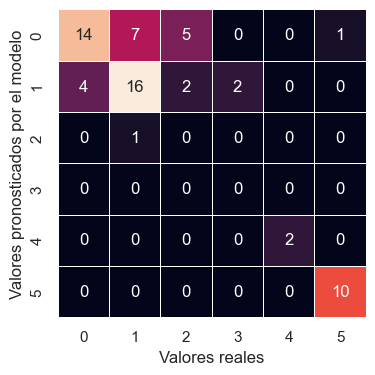

In [6]:
mat = confusion_matrix(y_test_data, predictions1)
plt.subplots(figsize=(4,4))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, linewidth=.5)
plt.xlabel('Valores reales')
plt.ylabel('Valores pronosticados por el modelo')

In [7]:
# Arbol de decisión
modelo2 = tree.DecisionTreeClassifier()
modelo2.fit(x_training_data, y_training_data)
predictions2 = modelo2.predict(x_test_data)

sc3 = metrics.accuracy_score(predictions2,y_test_data)

report2 = classification_report(y_test_data, predictions2)
print(report2)

              precision    recall  f1-score   support

           1       0.64      0.50      0.56        18
           2       0.70      0.67      0.68        24
           3       0.31      0.57      0.40         7
           5       0.67      1.00      0.80         2
           6       0.50      0.50      0.50         2
           7       0.89      0.73      0.80        11

    accuracy                           0.62        64
   macro avg       0.62      0.66      0.62        64
weighted avg       0.66      0.62      0.64        64



In [8]:
pd.DataFrame([['Support Vector Machine',sc1],
              ['Support Vector Machine 1',sc2],
              ['Decision Tree',sc3]],
             columns=['Modelo','Accuracy'])

,Modelo,Accuracy
0,Support Vector Machine,0.34375
1,Support Vector Machine 1,0.65625
2,Decision Tree,0.62500


### Guardar Modelo y Despligue

In [9]:
from pickle import dump
from pickle import load

In [10]:
model_select = model1
def guardar_modelo(model_select,nombre):
    output = open(nombre,  'wb')
    dump(model_select,  output, -1)
    output.close()
def cargar_modelo(nombre): 
    input = open(nombre,  'rb')
    model_select = load(input)
    input.close()   
    return model_select

In [11]:
nombre = 'model_name.pkl'
guardar_modelo(model_select,nombre)

In [12]:
cargar_modelo(nombre)

SVC()

**Despliegue**

In [16]:
svm_mod = svm.SVC(C=0.1, gamma=0.1, kernel='poly')
svm_mod.fit(x_data.iloc[:,0:5],y_data)

SVC(C=0.1, gamma=0.1, kernel='poly')

In [17]:
from IPython.display import display
def f(RI, Na, Mg, Al, Si):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si]])
    print("The Glass Type is {}".format(y_val))

In [18]:
interact(f, RI=(1.50,1.54,0.0001),Na=(10.7,17.4),Mg=(0,4.5),Al=(0,3.5),Si=(69,76))

interactive(children=(FloatSlider(value=1.52, description='RI', max=1.54, min=1.5, step=0.0001), FloatSlider(v…

<function __main__.f(RI, Na, Mg, Al, Si)>